In [1]:
# 该文件用于处理数据并可视化
import csv 
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#加上这句话，图片会嵌入notebook而不是跳出新窗口查看图片
%matplotlib inline
# 绘制漂亮的图形，避免模糊的图像
%config InlineBackend.figure_format = 'retina'
# 设置环境
sns.set_context('notebook')
sns.set(style="ticks", color_codes=True)
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 启用多个单元输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

18.380657196044922 6.0 2894.25
18.380657196044922


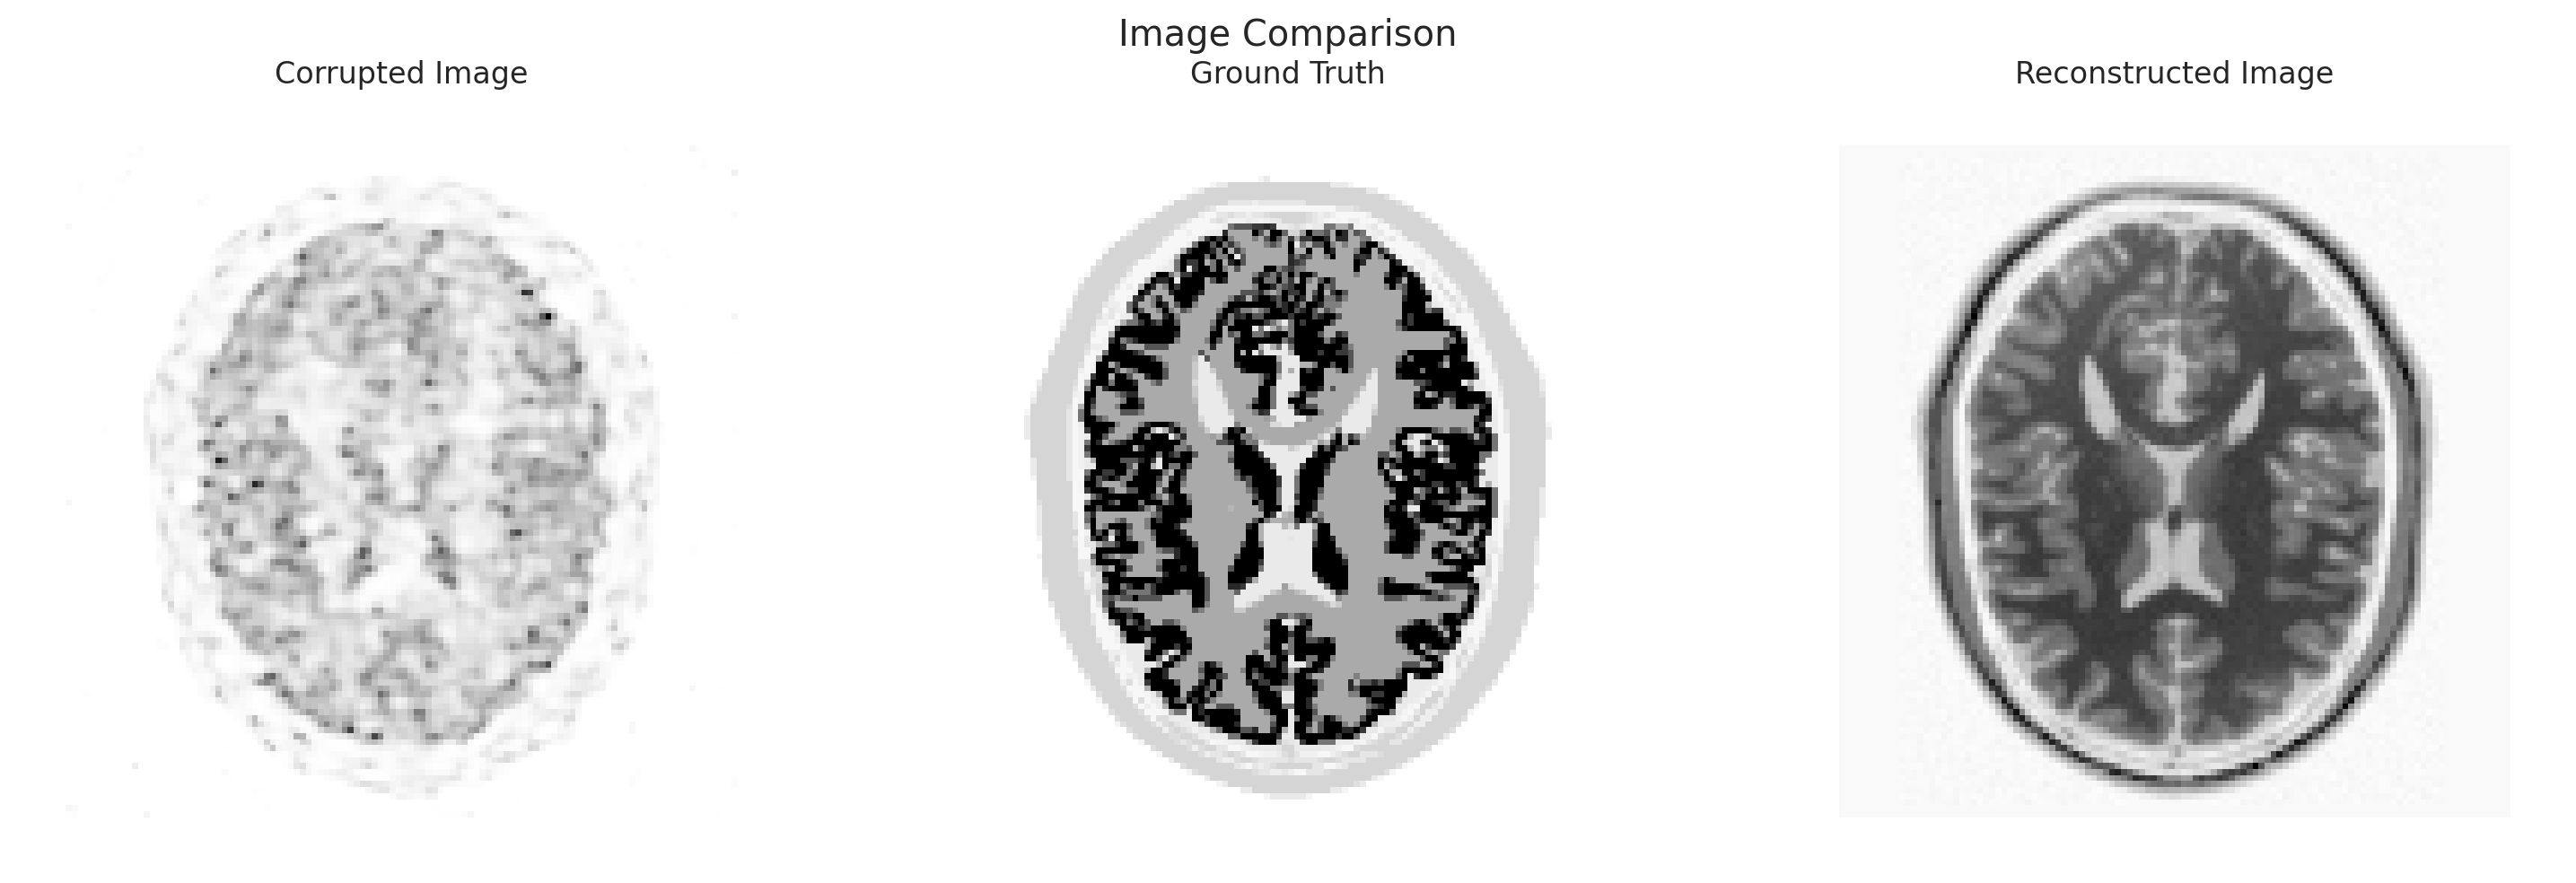

Baseline MSE: 0.9146751660782677
Baseline PSNR: 15.95035612850478
Baseline SSIM: 0.7247992969316387


In [3]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
corrupted_image = np.squeeze(np.load("/home/xzhang/Documents/我的模型/data/corrupted_images/target_padded_brain.npy"))
ground_truth = np.squeeze(np.load("/home/xzhang/Documents/我的模型/data/ground_truth/ground_truth_brain.npy"))
# mask = np.squeeze(np.load('/home/xzhang/Documents/我的模型/data/noisy_images/mask_padded.npy'))
# corrupted_image = np.squeeze(np.load("/home/xzhang/Documents/我的模型/data/corrupted_images/target_padded.npy"))
# ground_truth = np.squeeze(np.load("/home/xzhang/Documents/我的模型/data/ground_truth/ground_truth_padded.npy"))
mr = np.squeeze(np.load("/home/xzhang/Documents/我的模型/data/ground_truth/ground_truth_mr.npy"))
# mse_baseline = np.mean((corrupted_image - ground_truth) ** 2)
mse_baseline = np.mean((corrupted_image - ground_truth) ** 2)
psnr_baseline = peak_signal_noise_ratio(ground_truth, corrupted_image, data_range=np.amax(ground_truth) - np.amin(ground_truth))
ssim_baseline = structural_similarity(ground_truth, corrupted_image, data_range=np.amax(ground_truth) - np.amin(ground_truth))
print(np.max(corrupted_image),np.max(ground_truth),np.max(mr))
mr_scaled = (mr-np.min(mr))*(np.max(corrupted_image)-np.min(corrupted_image))/(np.max(mr)-np.min(mr))
print(np.max(mr_scaled))
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.subplots_adjust(hspace=0.3)


im1 =axes[0].imshow(corrupted_image, cmap='gray_r')
axes[0].set_title('Corrupted Image')
axes[0].axis('off')  # 隐藏坐标轴

# 绘制子图2
im2 =axes[1].imshow(ground_truth, cmap='gray_r')
axes[1].set_title('Ground Truth')
axes[1].axis('off')  # 隐藏坐标轴

# 绘制子图3
im3 =axes[2].imshow(mr_scaled, cmap='gray_r')
axes[2].set_title('Reconstructed Image')
axes[2].axis('off')  # 隐藏坐标轴

# 设置整体图的标题
fig.suptitle('Image Comparison')

# 调整布局
plt.tight_layout()
plt.show()
print("Baseline MSE:", mse_baseline)
print("Baseline PSNR:", psnr_baseline)
print("Baseline SSIM:", ssim_baseline);

In [178]:
df_n = pd.read_csv('/home/xzhang/Documents/simplified_pipeline/metrics/skip_connection/skip_cookie.csv').iloc[:,1:]
# df_n['dis'] = 'normal'
# df_n.loc[df_n[df_n['model']=='Full_DIP_backbone_kaiming_uniform_brain'].index,'dis'] = 'uniform'
# df_n.loc[df_n[df_n['model']=='Full_DIP_backbone_xavier_uniform_brain'].index,'dis'] = 'uniform'
# df_n.loc[df_n[df_n['model']=='Full_DIP_backbone_kaiming_norm_brain'].index,'dis'] = 'norm'
# df_n.loc[df_n[df_n['model']=='Full_DIP_backbone_xavier_norm_brain'].index,'dis'] = 'norm'

df_n.head()

,model,num_layers,num_channels,sigma_p,train,iteration,loss,mse,psnr,ssim
0,DIP_skip_add,3,128,0,train_0,1,73401.3400,18417.624470,3.394626,0.037690
1,DIP_skip_add,3,128,0,train_0,2,19191.7270,3099.897275,9.212740,0.069294
2,DIP_skip_add,3,128,0,train_0,3,5670.1387,1922.574871,14.452768,0.053523
3,DIP_skip_add,3,128,0,train_0,4,4717.8680,2101.818748,15.233531,0.068798
4,DIP_skip_add,3,128,0,train_0,5,4199.9260,2324.758397,15.726753,0.076742


In [172]:
df_u = pd.read_csv('/home/xzhang/Documents/simplified_pipeline/metrics/baseline/baseline_cookie.csv').iloc[:,1:]
# df_u['dis'] = 'uniform'
df_u.head()

,model,num_layers,num_channels,sigma_p,train,iteration,loss,mse,psnr,ssim
0,Full_DIP_backbone_uniform,3,128,0,train_0,0,214359.8400,49181.036013,-1.259214,0.083820
1,Full_DIP_backbone_uniform,3,128,0,train_0,1,73081.8300,16991.697978,3.408379,0.139707
2,Full_DIP_backbone_uniform,3,128,0,train_0,2,15533.6460,3301.538966,10.070998,0.138175
3,Full_DIP_backbone_uniform,3,128,0,train_0,3,5249.2534,1809.817844,14.783767,0.167003
4,Full_DIP_backbone_uniform,3,128,0,train_0,4,4114.5684,2001.822345,15.837709,0.181918


In [206]:
df = pd.concat([df_n,df_u],axis=0)
df.head()

,model,num_layers,num_channels,sigma_p,train,iteration,loss,mse,psnr,ssim
0,DIP_skip_add,3,128,0,train_0,1,73401.3400,18417.624470,3.394626,0.037690
1,DIP_skip_add,3,128,0,train_0,2,19191.7270,3099.897275,9.212740,0.069294
2,DIP_skip_add,3,128,0,train_0,3,5670.1387,1922.574871,14.452768,0.053523
3,DIP_skip_add,3,128,0,train_0,4,4717.8680,2101.818748,15.233531,0.068798
4,DIP_skip_add,3,128,0,train_0,5,4199.9260,2324.758397,15.726753,0.076742


In [217]:
grouped_df = df.groupby(['model', 'num_layers', 'num_channels',  'sigma_p','train']).agg({
    'loss': 'min',
    'mse': 'min',
    'psnr': 'max',
    'ssim': 'max'
}).reset_index()
grouped_df.head()
grouped_df['model'].unique()

,model,num_layers,num_channels,sigma_p,train,loss,mse,psnr,ssim
0,DIP_skip_add,3,128,0,train_0,180.52000,452.242206,25.348150,0.839158
1,DIP_skip_add,3,128,0,train_1,173.61324,419.446589,25.697439,0.837301
2,DIP_skip_add,3,128,0,train_10,171.61499,469.347189,25.214613,0.820767
3,DIP_skip_add,3,128,0,train_11,152.54886,441.013356,25.480462,0.826145
4,DIP_skip_add,3,128,0,train_12,184.53381,436.202428,25.495257,0.828438


array(['DIP_skip_add', 'DIP_skip_concat', 'Full_DIP_backbone_normal',
       'Full_DIP_backbone_uniform'], dtype=object)

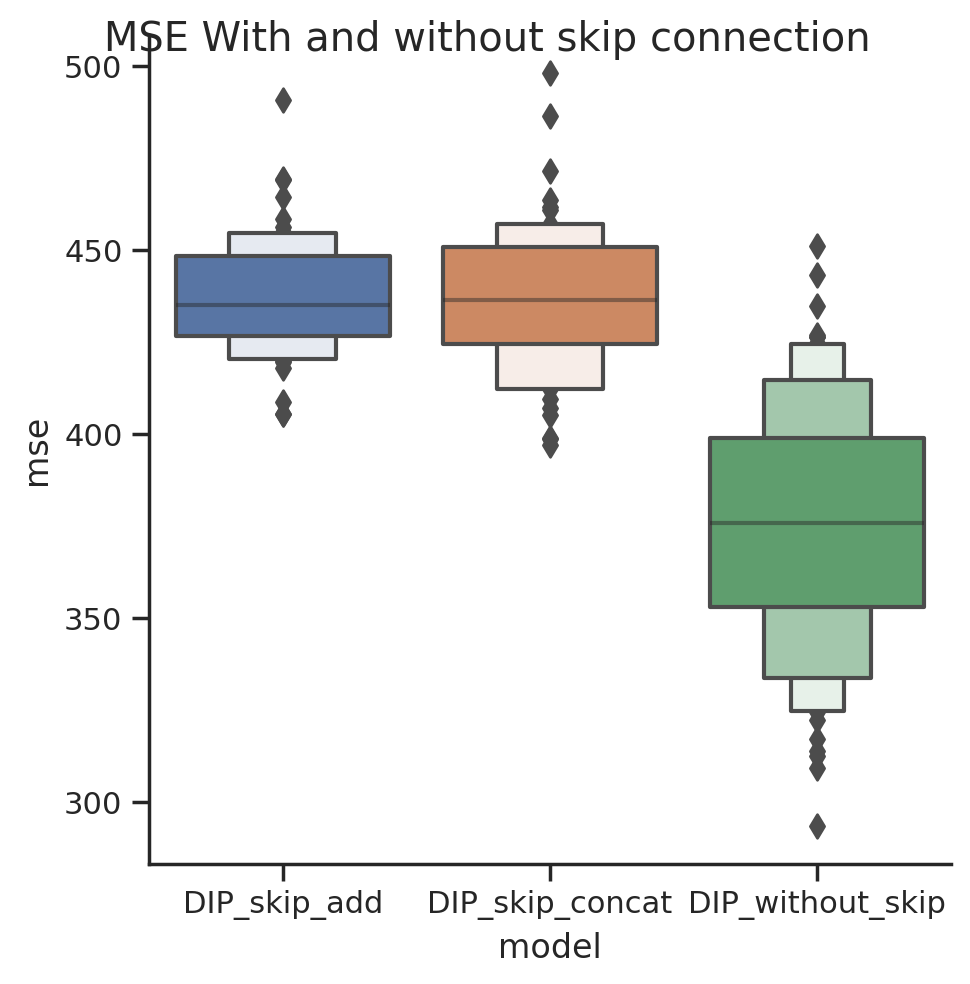

In [219]:
data = grouped_df

data["model"] = data["model"].replace("Full_DIP_backbone_mr", "mr")
data["model"] = data["model"].replace("Full_DIP_backbone_normal", "DIP_without_skip")
data["model"] = data["model"].replace("Full_DIP_backbone_uniform","DIP_without_skip")

# data["model"] = data["model"].replace("Full_DIP_backbone_kaiming_norm_brain", "kaiming")
# data["model"] = data["model"].replace("Full_DIP_backbone_kaiming_uniform_brain", "kaiming")
# data["model"] = data["model"].replace("Full_DIP_backbone_xavier_norm_brain", "xavier")
# data["model"] = data["model"].replace("Full_DIP_backbone_xavier_uniform_brain", "xavier")

# data = data.drop(data[data['model']=='mr'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v3'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v0'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v1'].index).reset_index(drop=True)
# data = data.drop(data[ (data['sigma_p']>2) ].index)
# data = data.drop(data[ (data['sigma_p']==0.5) ].index)
# data = data.drop(data[ (data['sigma_p']==0.1) ].index)
# # data = data.drop(data[ (data['sigma_p']>0.5) & (data['model']=='Full_DIP_noise_v0')].index)
# data = data.drop(data[ (data['sigma_p']>4) & (data['model'] == 'v0')].index)
# data = data.drop(data[ (data['sigma_p']>0.5) & (data['model'] == 'v3')].index)
sns.catplot(x='model', y='mse',row=None,hue = None,col=None, data=data, kind='boxen')
baseline_value = psnr_baseline #-50  # 假设baseline值为50
# plt.axhline(y = 0.5, color='b', linestyle='--', label='Baseline')
# plt.text(0.2,16, f'Baseline = {psnr_baseline:.2f}', color='b', fontsize=12)  # 添加文字说明
plt.suptitle('MSE With and without skip connection')
plt.show();

In [207]:
# df =df_n
# df["model"] = df["model"].replace("Full_DIP_backbone_normal", "DIP")
# df["model"] = df["model"].replace("Full_DIP_backbone_uniform","DIP")
# df["model"] = df["model"].replace("DIP","DIP_without_skip")
grouped_df_v2 = df.groupby(['model', 'num_layers', 'num_channels',  'sigma_p','train']).apply(lambda x: x.loc[x['mse'].idxmin(),['iteration','mse']]).reset_index()
grouped_df_v2.columns = ['model', 'num_layers', 'num_channels',  'sigma_p','train','min_mse_iteration','min_mse']
grouped_df_v2['sigma_p'] = grouped_df_v2['sigma_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
grouped_df_v2

,model,num_layers,num_channels,sigma_p,train,min_mse_iteration,min_mse
0,DIP_skip_add,3,128,0,train_0,612,452.242206
1,DIP_skip_add,3,128,0,train_1,141,419.446589
2,DIP_skip_add,3,128,0,train_10,149,469.347189
3,DIP_skip_add,3,128,0,train_11,121,441.013356
4,DIP_skip_add,3,128,0,train_12,616,436.202428
...,...,...,...,...,...,...,...
195,Full_DIP_backbone_uniform,3,128,0,train_5,314,348.204371
196,Full_DIP_backbone_uniform,3,128,0,train_6,383,412.998353
197,Full_DIP_backbone_uniform,3,128,0,train_7,370,354.589695
198,Full_DIP_backbone_uniform,3,128,0,train_8,262,418.560353


In [208]:
grouped_df_v3 = grouped_df_v2.groupby(['model', 'num_layers', 'num_channels',  'sigma_p']).apply(lambda x: pd.DataFrame({
                'best_mse' : [x.loc[x['min_mse'].idxmin(), 'min_mse']],
                'worst_mse' : [x.loc[x['min_mse'].idxmax(), 'min_mse']],
                'best_result_train': [x.loc[x['min_mse'].idxmin(), 'train']],
                'b_iteration': [x.loc[x['min_mse'].idxmin(), 'min_mse_iteration']],
                'worst_result_train': [x.loc[x['min_mse'].idxmax(), 'train']],
                'w_iteration': [x.loc[x['min_mse'].idxmax(), 'min_mse_iteration']]
            })).reset_index()
# grouped_df_v3['sigma_p'] = grouped_df_v3['sigma_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
data = grouped_df_v3
data

,model,num_layers,num_channels,sigma_p,level_4,best_mse,worst_mse,best_result_train,b_iteration,worst_result_train,w_iteration
0,DIP_skip_add,3,128,0,0,405.415387,490.663432,train_38,134,train_21,121
1,DIP_skip_concat,3,128,0,0,397.011081,498.007342,train_33,129,train_39,164
2,Full_DIP_backbone_normal,3,128,0,0,313.909116,443.066887,train_37,174,train_30,422
3,Full_DIP_backbone_uniform,3,128,0,0,293.432793,450.876920,train_9,223,train_14,337


In [189]:

# average image

grouped_df = grouped_df_v2.groupby(['model', 'num_layers','num_channels','sigma_p'])
def get_file_list(group):
    files = []
    for train, iteration in zip(group['train'], group['min_mse_iteration']):
        files.append(f'{train}/iters_{iteration}.npy')
    return files
# 应用函数并创建新的DataFrame
result_df = grouped_df.apply(get_file_list).reset_index(name='files')
# path_suffix = '/home/xzhang/Documents/simplified_pipeline/data/results/images/normal_input/'
path_suffix = '/home/xzhang/Documents/simplified_pipeline/data/results/images/skip_cookie/'
# path_suffix = '/hdd/23_07/noise_test/'
for i,row in result_df.iterrows():
    average = np.zeros((128,128))
    for file in row['files']:
        file_name = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/{file}"
        average += np.load(file_name)
    average /= len(row['files'])
    np.save(file=path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy",arr=average)
    print(f"adding average image for {row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}")
    variance = np.zeros((128,128))
    for file in row['files']:
        file_name = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/{file}"
        variance += (np.load(file_name)-average)**2
    variance /= (len(row['files'])-1)
    np.save(file=path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/variance.npy",arr=variance)
    print(f"adding variance image for {row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}")


adding average image for DIP_skip_add/3_128_0
adding variance image for DIP_skip_add/3_128_0
adding average image for DIP_skip_concat/3_128_0
adding variance image for DIP_skip_concat/3_128_0


In [210]:
data = grouped_df_v3
# data["model"] = data["model"].replace("Full_DIP_noise_v0", "v0")
# data["model"] = data["model"].replace("Full_DIP_noise_v1", "v1")
# data["model"] = data["model"].replace("Full_DIP_noise_v2", "v2")
# data["model"] = data["model"].replace("Full_DIP_noise_v3", "v3")
# data = data[data['model']=='Full_DIP'].reset_index(drop=True)
data = data.drop(data[data['model']=='Full_DIP_backbone_normal'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='uniform_noise'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='ground_truth_padded'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='gt_add_unform'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v3'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v2'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v1'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v3'].index).reset_index(drop=True)
# data = data.drop(data[ (data['sigma_p']==0.5) ].index)
# data = data.drop(data[ (data['sigma_p']=='0.1') ].index)
# # data = data.drop(data[ (data['sigma_p']=='5') ].index)
# # data = data.drop(data[ (data['sigma_p']>0.5) & (data['model']=='Full_DIP_noise_v0')].index)
# data = data.drop(data[ (data['sigma_p']!='1') & (data['model'] == 'Full_DIP_noise_v0')].index)
# # data = data.drop(data[ (data['sigma_p']>4) & (data['model'] == 'v3')].index)
# data = data.drop(data[data['sigma_p']=='10'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v1'].index).reset_index(drop=True)
# # data = data.drop(data[data['model']=='v2'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v3'].index).reset_index(drop=True)
data

,model,num_layers,num_channels,sigma_p,level_4,best_mse,worst_mse,best_result_train,b_iteration,worst_result_train,w_iteration
0,DIP_skip_add,3,128,0,0,405.415387,490.663432,train_38,134,train_21,121
1,DIP_skip_concat,3,128,0,0,397.011081,498.007342,train_33,129,train_39,164
2,Full_DIP_backbone_uniform,3,128,0,0,293.432793,450.876920,train_9,223,train_14,337


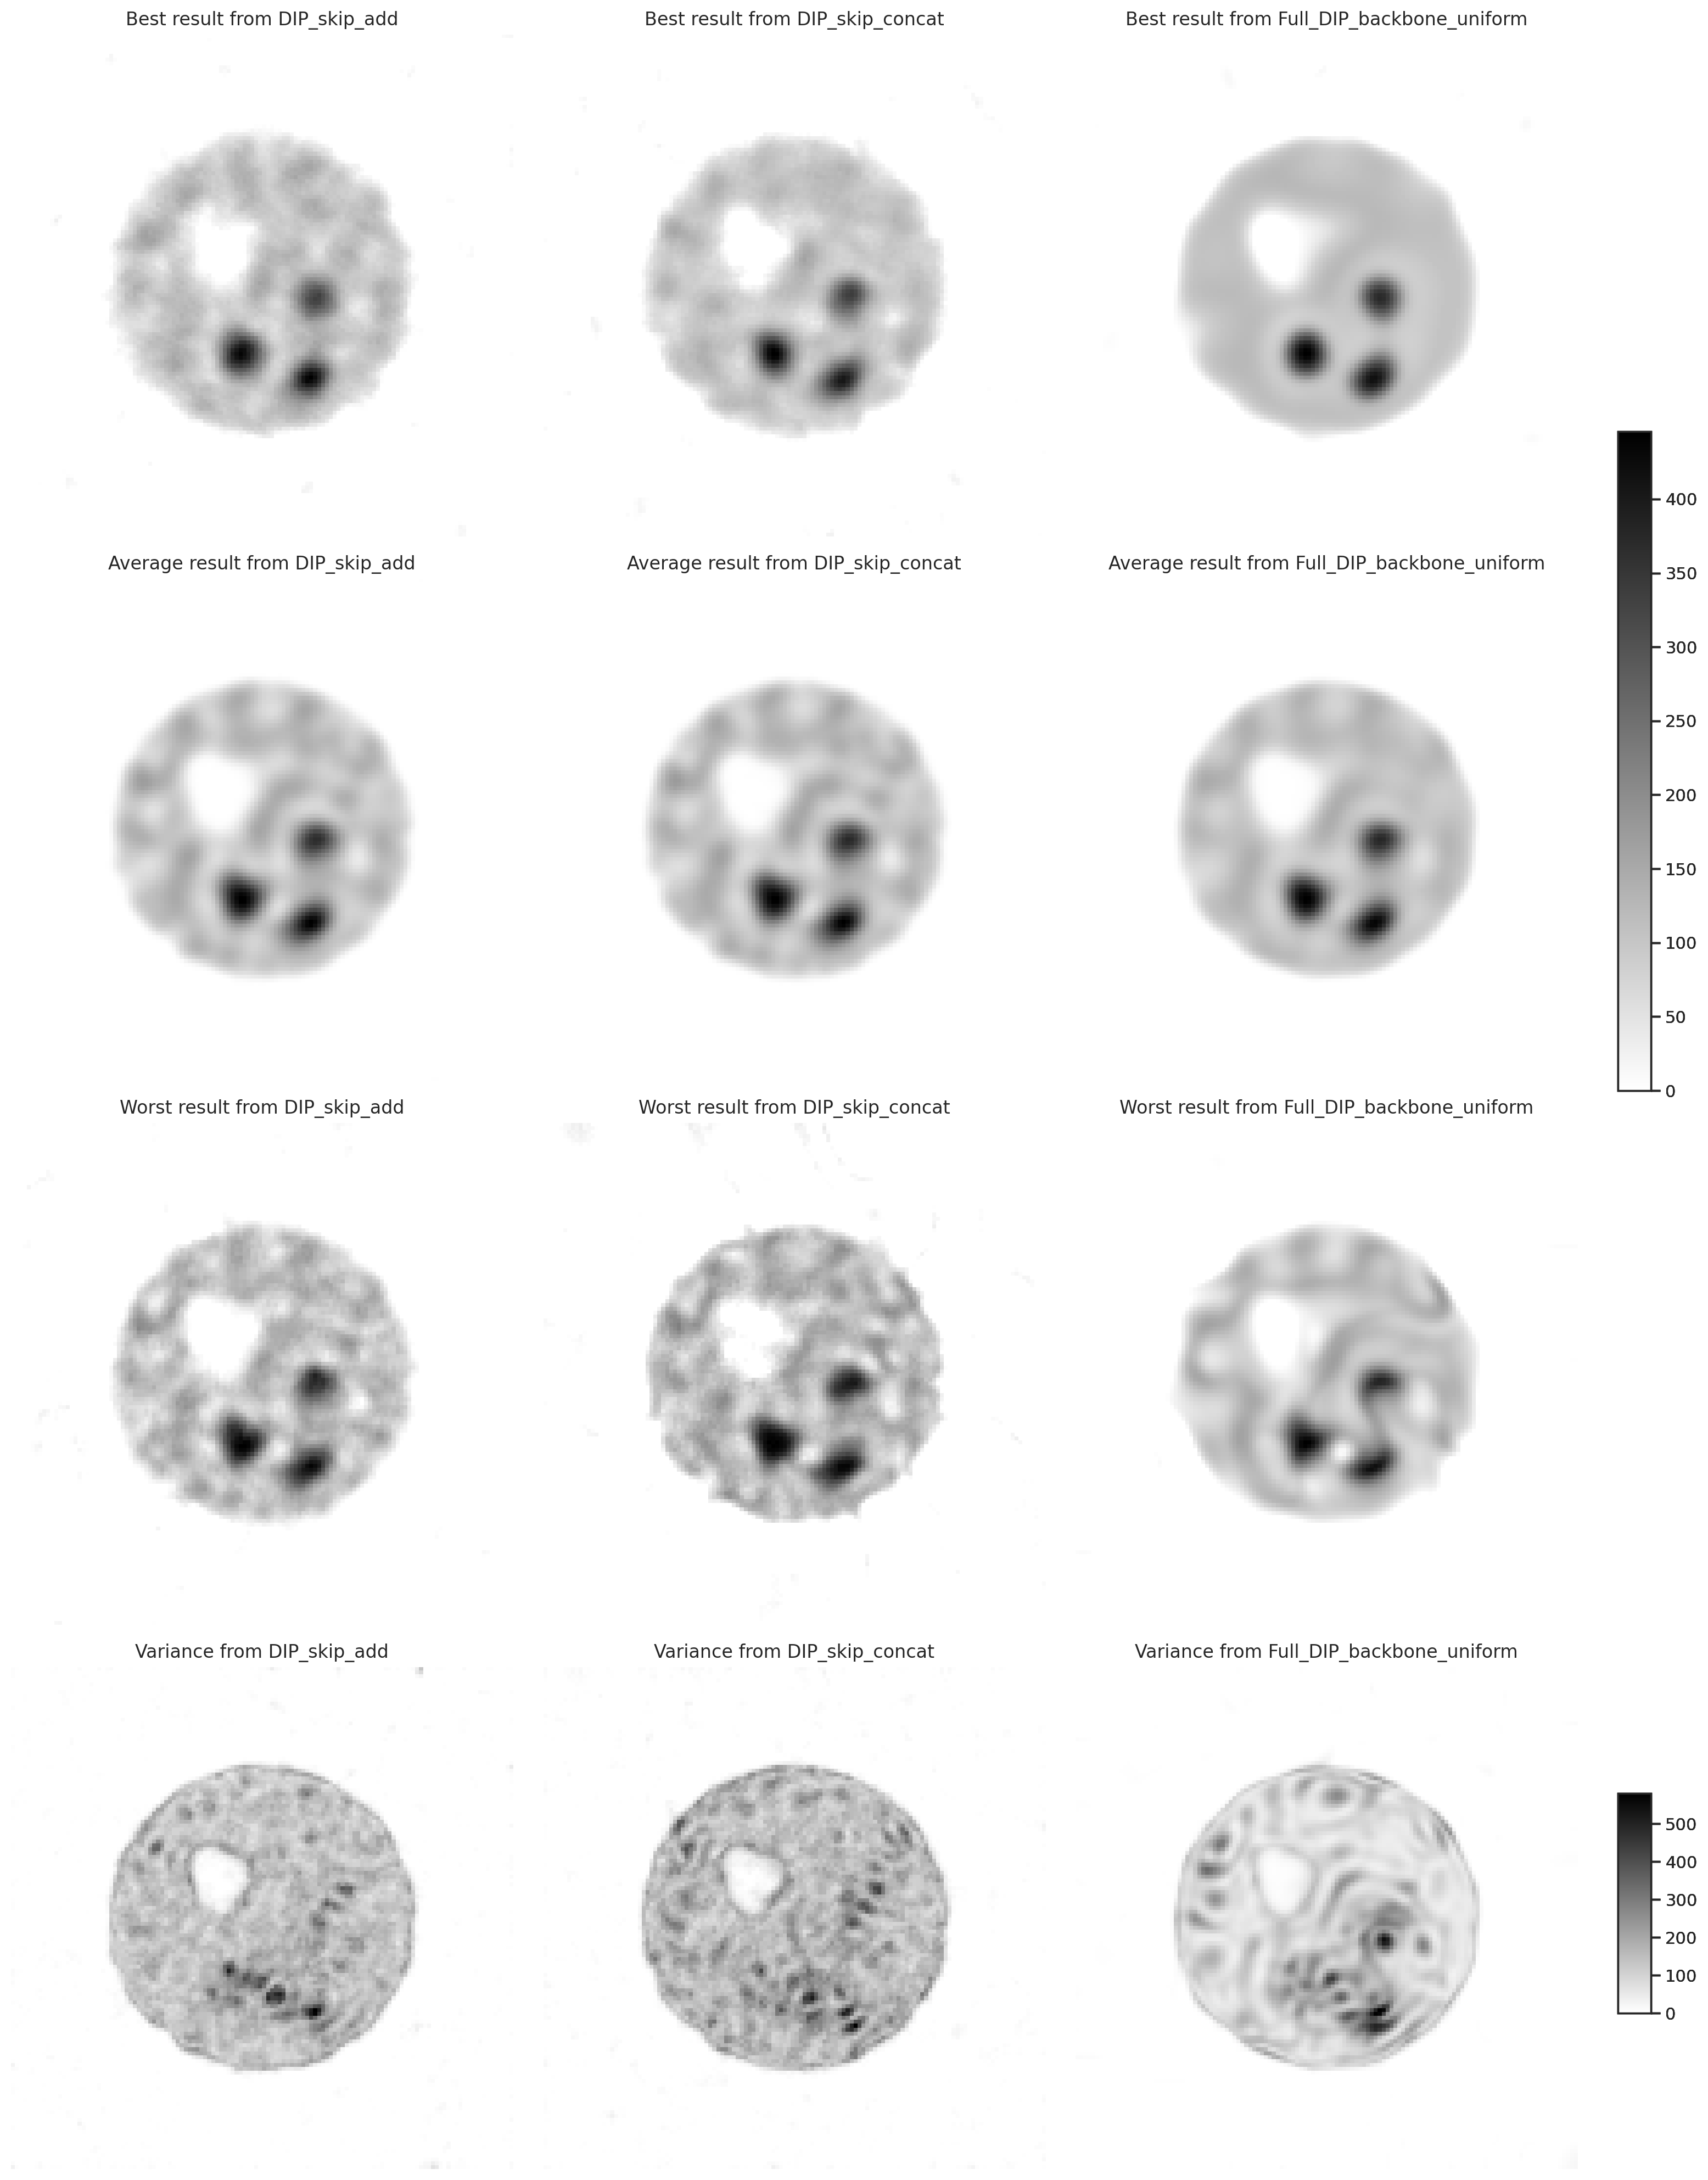

In [211]:
#plot image
import matplotlib.colors as colors
fig, axs = plt.subplots(4, len(data), figsize=(5 * len(data), 20))
fig.subplots_adjust(hspace=0.3)
# 根据上面获得的最佳和最差图片，找到并且打印出来
# 遍历每一行
for i, row in data.iterrows(): 
    # 构造文件路径
    best_image_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/{row['best_result_train']}/iters_{row['b_iteration']}.npy"
    average_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy"
    worst_image_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/{row['worst_result_train']}/iters_{row['w_iteration']}.npy"
    variance_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/variance.npy"
    
    best_image = np.load(best_image_path)
    average_image = np.load(average_path)
    worst_image = np.load(worst_image_path)
    variance_image = np.load(variance_path)

    axs[0, i].imshow(best_image, cmap='gray_r')
    axs[0, i].set_title(f"Best result from {row['model']}")
    axs[0, i].axis('off')
    axs[0, i].set_aspect('equal')  # 设置图像比例为1:1
    
    axs[1, i].imshow(average_image, cmap='gray_r')
    axs[1, i].set_title(f"Average result from {row['model']}")
    axs[1, i].axis('off')
    axs[1, i].set_aspect('equal')  # 设置图像比例为1:1
        
    axs[2, i].imshow(worst_image, cmap='gray_r')
    axs[2, i].set_title(f"Worst result from {row['model']}")
    axs[2, i].axis('off')
    axs[2, i].set_aspect('equal')  # 设置图像比例为1:1
    
    axs[3, i].imshow(variance_image, cmap='gray_r')
    axs[3, i].set_title(f"Variance from {row['model']}")
    axs[3, i].axis('off')
    axs[3, i].set_aspect('equal')  # 设置图像比例为1:1
  # 设置colorbar的位置和尺寸
    cax = fig.add_axes([1.0, 0.5, 0.02, 0.3])  # 设置colorbar的位置和尺寸
    fig.colorbar(axs[0, 0].images[0], cax=cax)   # 给best_image添加colorbar
    cax = fig.add_axes([1.0, 0.08, 0.02, 0.1])  # 设置colorbar的位置和尺寸
    fig.colorbar(axs[3, 0].images[0], cax=cax)      
    
# 调整整个图像的布局和尺寸
plt.tight_layout()
plt.show();

In [ ]:
data = grouped_df_v3
# data = data[data['model']=='Full_DIP'].reset_index(drop=True)
# data = data.drop(data[data['model']=='gaussian_noise'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='uniform_noise'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='ground_truth_padded'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='gt_add_unform'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='Full_DIP_noise_v3'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='Full_DIP_noise_v0'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='Full_DIP_noise_v1'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='Full_DIP_noise_v2'].index).reset_index(drop=True)
data = data.drop(data[data['sigma_p']=='10'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='v1'].index).reset_index(drop=True)
data = data.drop(data[data['model']=='v2'].index).reset_index(drop=True)
data = data.drop(data[(data['model']=='v0') & (data['sigma_p']=='5') ].index).reset_index(drop=True)
data = data.drop(data[data['model']=='v3'].index).reset_index(drop=True)
data

In [ ]:
filtered_data = pd.DataFrame()
df= df
data = data
# df['sigma_p'] = df['sigma_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
# 遍历 gdf 中的每一行
for i, row in data.iterrows():
    # 从 df 中提取相应的数据
    condition = (df['model'] == row['model']) & (df['num_layers'] == row['num_layers']) & (df['num_channels'] == row['num_channels']) & (df['sigma_p'] == row['sigma_p'])   & (df['train'] == row['best_result_train'])
    extracted_data = df[condition]
    
    # 将提取的数据添加到 filtered_data 中
    filtered_data = filtered_data.append(extracted_data)
filtered_data


In [ ]:
filtered_data = filtered_data [(filtered_data ["iteration"] >=10) & (filtered_data ["iteration"] <= 1000)]
g = sns.relplot(
    data=filtered_data,
    hue='sigma_p',
    x='iteration',
    y='mse',
    kind='line',
    col='model',
    # style='sigma_p',
    dashes=False,
    ci=None,
    linewidth=1
)

# 设置坐标轴标签和标题
g.set(xlabel="Iteration", ylabel='psnr')

# 显示图形
plt.show();


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import glob

# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Full_DIP_noise_v4/3_512_1/train_1/*.npy')
npy_files = glob.glob('/hdd/23_07/noise_test_uniform/Full_DIP_noise_v0/3_128_0/train_1/*.npy')
print(npy_files)
# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Res_DIP_backbone/3_128_0/train_0/*.npy')
npy_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[1].split('.')[0]))
print(npy_files)
def show_image(file_index):
    data = np.load(npy_files[file_index])
    data = np.max(data)-data
    plt.imshow(data,cmap='gray')
    plt.title(f"Image {file_index + 1}")
    plt.axis('off')
    plt.show()
interact(show_image, file_index=IntSlider(min=0, max=len(npy_files)-1, step=1, value=0))


In [ ]:
for i,row in result_df.iterrows():
    try:
        # 删除文件
        os.remove(path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy")
        print(f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy 文件删除成功！")
    except OSError as e:
        print("文件删除失败:", e)

In [ ]:
import numpy as np
gt = np.load('/home/xzhang/Documents/我的模型/data/ground_truth/ground_truth_padded.npy')
ci = np.load('/home/xzhang/Documents/我的模型/data/corrupted_images/target_padded.npy')
gt.shape


In [ ]:
ci_r= np.max(ci) - ci
ci_r= np.max(ci) - ci
max_ci = np.max(ci)
min_ci = np.min(ci)
mean_ci = np.mean(ci)
std_ci = np.std(ci)
print(max_ci,min_ci,mean_ci, std_ci)
plt.imshow(ci_r,cmap='gray')
plt.show();

In [ ]:
gt_r= np.max(gt) - gt
max_gt = np.max(gt)
min_gt = np.min(gt)
mean_gt = np.mean(gt)
std_gt = np.std(gt)
print(max_gt,min_gt,mean_gt, std_gt)
plt.imshow(gt_r,cmap='gray')
plt.show();

In [ ]:
normalized_ci = ci / np.max(ci)  # 归一化 ci
max_normalized_ci = np.max(normalized_ci)
min_normalized_ci = np.min(normalized_ci)
mean_normalized_ci = np.mean(normalized_ci)
std_normalized_ci = np.std(normalized_ci)
print(max_normalized_ci,min_normalized_ci,mean_normalized_ci, std_normalized_ci)

In [ ]:
uniform_noise = np.random.uniform(0, 0.5, (128, 128,1))

print(np.std(uniform_noise))
added_uniform = normalized_gt + uniform_noise  # 归一化的 gt 加上 uniform 噪声
print(added_uniform.shape)
added_uniform = added_uniform * np.max(gt)  # 还原归一化的图像为原始尺度
added_uniform_r= np.max(added_uniform) - added_uniform
plt.imshow(added_uniform_r,cmap='gray')
plt.show()

In [ ]:
gaussian_noise = np.random.normal(0, 0.5, (128, 128,1))
mean_gt = np.mean(gt)
std_gt = np.std(gt)
print(std_gt)
normalized_gt = (gt - mean_gt) / std_gt  # 归一化 gt
std_gt = np.std(normalized_gt)
print(std_gt)
added_gaussian = normalized_gt + gaussian_noise  # 归一化的 gt 加上 Gaussian 噪声
added_gaussian = added_gaussian * std_gt + mean_gt  # 还原归一化的图像为原始尺度
print(added_gaussian.shape)
added_gaussian_r= np.max(added_gaussian) - added_gaussian
plt.imshow(added_gaussian_r,cmap='gray')
plt.show()

In [ ]:
suffix = '/home/xzhang/Documents/simplified_pipeline/data/corrupted_images/'

In [ ]:
np.save(suffix+'gaussian_noise.npy', gaussian_noise)
np.save(suffix+'uniform_noise.npy', uniform_noise)
np.save(suffix+'gt_add_unform.npy', added_uniform)
np.save(suffix+'gt_add_gaussian.npy', added_gaussian)

In [ ]:
import torch


In [ ]:
x = torch.distributions.Uniform(0,1).sample([1,1,128,128])
benoulli_p = 0.7
s_up = 2
s_down = 0

sample_mask = torch.distributions.Bernoulli(probs=benoulli_p).sample(x.shape)  # 使用伯努利分布进行采样,p概率为1，否则为0
sample_mask = sample_mask.float()  # 将采样结果转换为float类型，值为0或1
sampled_x = x * (sample_mask *s_up + (1 - sample_mask) * s_down)  # 根据伯努利采样结果对像素进行缩放，为1则放大，为0则缩小
out = sampled_x    
print(out.size())


# 新的研究方向，因为和其他的不一样，所以说重新开了一个


# 简单介绍一下分类：
- pixel-wise masked DIP ：
  - ratio_p 大于ratio\*up,小于ratio\*down

In [ ]:
df = pd.read_csv('/home/xzhang/Documents/simplified_pipeline/models_metrics_sampled.csv').iloc[:,1:]
df.head()

In [ ]:
grouped_df = df.groupby(['model', 'num_layers', 'num_channels',  'ratio_p','s_down','s_up','train']).agg({
    'loss': 'min',
    'mse': 'min',
    'psnr': 'max',
    'ssim': 'max'
}).reset_index()
grouped_df
grouped_df['model'].unique()

In [ ]:

data = grouped_df
data = data[data['ratio_p']==0.1].reset_index(drop=True)
# data = data[(data['ratio_p']==0.1)|(data['ratio_p']==0.9)].reset_index(drop=True)
data.head()
# data = data.drop(data[ (data['sigma_p']>2) ].index)
# # data = data.drop(data[ (data['sigma_p']>0.5) & (data['model']=='Full_DIP_noise_v0')].index)
# # data = data.drop(data[ (data['sigma_p']>4) & (data['model'] == 'v0')].index)
# data = data.drop(data[(data['s_down']<0.1)&(data['ratio_p']==0.9)].index)
# data = data.drop(data[(data['s_down']==0.1)&((data['s_down']==0.1))&(data['ratio_p']==0.9)].index)
# data = data.drop(data[(data['s_down']<0.1)&(data['ratio_p']==0.1)].index)
# data = data.drop(data[(data['s_down']==0.1)&((data['s_down']==0.1))&(data['ratio_p']==0.1)].index)
# data = data.drop(data[data['mse']>350].index)
# sns.catplot(x='model', y='mse',row=None,hue = 's_down',col= 's_up', data=data, kind='boxen')
sns.catplot(x='model', y='mse',row='ratio_p' ,hue ='s_down',col= 's_up', data=data, kind='boxen')
plt.suptitle('mse')
plt.show();

In [ ]:
grouped_df_v2 = df.groupby(['model', 'num_layers', 'num_channels',  'ratio_p','s_down','s_up','train']).apply(lambda x: x.loc[x['mse'].idxmin(),['iteration','mse']]).reset_index()
grouped_df_v2.columns = ['model', 'num_layers', 'num_channels', 'ratio_p','s_down','s_up','train','min_mse_iteration','min_mse']
# grouped_df_v2['sigma_p'] = grouped_df_v2['sigma_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
grouped_df_v2['s_down'] = grouped_df_v2['s_down'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
grouped_df_v2['s_up'] = grouped_df_v2['s_up'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
grouped_df_v2

In [ ]:
grouped_df_v3 = grouped_df_v2.groupby(['model', 'num_layers', 'num_channels',  'ratio_p','s_down','s_up']).apply(lambda x: pd.DataFrame({
                'best_mse' : [x.loc[x['min_mse'].idxmin(), 'min_mse']],
                'worst_mse' : [x.loc[x['min_mse'].idxmax(), 'min_mse']],
                'best_result_train': [x.loc[x['min_mse'].idxmin(), 'train']],
                'b_iteration': [x.loc[x['min_mse'].idxmin(), 'min_mse_iteration']],
                'worst_result_train': [x.loc[x['min_mse'].idxmax(), 'train']],
                'w_iteration': [x.loc[x['min_mse'].idxmax(), 'min_mse_iteration']]
            })).reset_index()
# grouped_df_v3['s_down'] = grouped_df_v3['s_down'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
# grouped_df_v3['s_up'] = grouped_df_v3['s_up'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
data = grouped_df_v3
data

In [ ]:

grouped_df = grouped_df_v2.groupby(['model', 'num_layers','num_channels','ratio_p','s_down','s_up'])
def get_file_list(group):
    files = []
    for train, iteration in zip(group['train'], group['min_mse_iteration']):
        files.append(f'{train}/iters_{iteration}.npy')
    return files
# 应用函数并创建新的DataFrame
result_df = grouped_df.apply(get_file_list).reset_index(name='files')
path_suffix ='/home/xzhang/Documents/simplified_pipeline/data/results/images/sampled/'
# path_suffix = '/hdd/23_07/pw_masked/'
for i,row in result_df.iterrows():
    average = np.zeros((128,128))
    for file in row['files']:
        file_name = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}/{file}"
        average += np.load(file_name)
    average /= len(row['files'])
    np.save(file=path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}/average.npy",arr=average)
    print(f"adding average image for {row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}")

In [ ]:
data = grouped_df_v3
# data = data[data['ratio_p']==0.9].reset_index(drop=True)
data = data[data['ratio_p']==0.1].reset_index(drop=True)
data = data.drop(data[data['s_down']=='0'].index).reset_index(drop=True)
data = data.drop(data[(data['s_down']=='0.1')&(data['s_up']=='2')].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='ground_truth_padded'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='gt_add_unform'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v2'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v1'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v3'].index).reset_index(drop=True)
# data = data.drop(data[data['sigma_p']=='10'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v1'].index).reset_index(drop=True)
# # data = data.drop(data[data['model']=='v2'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v3'].index).reset_index(drop=True)
data

In [ ]:
#plot image
fig, axs = plt.subplots(3, len(data), figsize=(5 * len(data), 15))
fig.subplots_adjust(hspace=0.3)
# 根据上面获得的最佳和最差图片，找到并且打印出来
# 遍历每一行
for i, row in data.iterrows():
    
    # 构造文件路径
    best_image_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}/{row['best_result_train']}/iters_{row['b_iteration']}.npy"
    average_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}/average.npy"
    worst_image_path = path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['ratio_p']}_{row['s_down']}_{row['s_up']}/{row['worst_result_train']}/iters_{row['w_iteration']}.npy"

    best_image = np.load(best_image_path)
    average_image = np.load(average_path)
    worst_image = np.load(worst_image_path)
    # print(best_image.shape)
    # print(worst_image.shape)
    best_image = np.max(best_image) - best_image
    average_image = np.max(average_image)-average_image
    worst_image = np.max(worst_image) - worst_image


    axs[0,i].imshow(best_image, cmap='gray');
    axs[0,i].set_title(f"Best result from {row['model']}\nNum Layers: {row['num_layers']}\nNum Channels: {row['num_channels']}\nSigma: {row['ratio_p']}_{row['s_down']}_{row['s_up']}")
    axs[0,i].axis('off')
    
    axs[1,i].imshow(average_image, cmap='gray');
    axs[1,i].set_title(f"average_image from {row['model']}\nNum Layers: {row['num_layers']}\nNum Channels: {row['num_channels']}\nSigma: {row['ratio_p']}_{row['s_down']}_{row['s_up']}")
    axs[1,i].axis('off')
        
    axs[2,i].imshow(worst_image, cmap='gray');
    axs[2,i].set_title(f"Worst result from {row['model']}\nNum Layers: {row['num_layers']}\nNum Channels: {row['num_channels']}\nSigma: {row['ratio_p']}_{row['s_down']}_{row['s_up']}")
    axs[2,i].axis('off')
# 调整整个图像的布局和尺寸
plt.tight_layout()
plt.show();

In [ ]:
data = grouped_df_v3
# data = data[data['ratio_p']==0.1].reset_index(drop=True)
data = data.drop(data[data['s_down']=='0'].index).reset_index(drop=True)
# data = data.drop(data[data['s_up']=='2'].index).reset_index(drop=True)
data['ratio_p'] = data['ratio_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
# data = data.drop(data[data['model']=='ground_truth_padded'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='gt_add_unform'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v3'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v0'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='Full_DIP_noise_v1'].index).reset_index(drop=True)
# data = data.drop(data[data['sigma_p']=='10'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v1'].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v2'].index).reset_index(drop=True)
# data = data.drop(data[(data['model']=='v0') & (data['sigma_p']=='5') ].index).reset_index(drop=True)
# data = data.drop(data[data['model']=='v3'].index).reset_index(drop=True)

data

In [ ]:
filtered_data = pd.DataFrame()
df= df

# data = data.drop('level_6',axis=1).reset_index(drop=True)

print(df.dtypes,data.dtypes)
df.iloc[:,:5].astype(data.iloc[:,:5].dtypes)
print(df.dtypes,data.dtypes)
# df['ratio_p'] = df['ratio_p'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
# df['s_down'] = df['s_down'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
# df['s_up'] = df['s_up'].apply(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))
data

df[(df['model'] =='sampled_DIP') & (df['num_layers'] == 3) & (df['num_channels'] == 128) & (df['ratio_p'] == 0.1) &(df['s_down'] == 0.1)&(df['s_up'] == 1) ]
# 遍历 gdf 中的每一行
for i, row in data.iterrows():
    # 从 df 中提取相应的数据
    condition = (df['model'] == row['model']) & (df['num_layers'] == row['num_layers']) & (df['num_channels'] == row['num_channels']) & (df['ratio_p'] == row['ratio_p']) &(df['s_down'] == row['s_down'])&(df['s_up'] == row['s_up'])  & (df['train'] == row['best_result_train'])
    extracted_data = df[condition]

    # 将提取的数据添加到 filtered_data 中
    filtered_data = filtered_data.append(extracted_data)
filtered_data


In [ ]:
filtered_data = filtered_data [(filtered_data ["iteration"] >=10) & (filtered_data ["iteration"] <= 3000)]
g = sns.relplot(
    data=filtered_data,
    hue='s_down',
    x='iteration',
    y='mse',
    kind='line',
    col='s_up',
    row='ratio_p',
    # style='sigma_p',
    dashes=False,
    ci=None,
    linewidth=1
)

# 设置坐标轴标签和标题
g.set(xlabel="Iteration", ylabel='psnr')

# 显示图形
plt.show();

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import glob

# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Full_DIP_noise_v4/3_512_1/train_1/*.npy')
# npy_files = glob.glob('/hdd/23_07/noise_test_uniform/Full_DIP_noise_v0/3_128_0/train_1/*.npy')

npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/sampled/sampled_DIP/3_128_0.1_0.1_1/train_2/*.npy')
print(npy_files)
# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Res_DIP_backbone/3_128_0/train_0/*.npy')
npy_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[1].split('.')[0]))
print(npy_files)
def show_image(file_index):
    data = np.load(npy_files[file_index])
    data = np.max(data)-data
    plt.imshow(data,cmap='gray')
    plt.title(f"Image {file_index + 1}")
    plt.axis('off')
    plt.show()
interact(show_image, file_index=IntSlider(min=0, max=len(npy_files)-1, step=1, value=0))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import glob

# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Full_DIP_noise_v4/3_512_1/train_1/*.npy')
npy_files = glob.glob('/hdd/23_07/noise_test_uniform/Full_DIP_noise_v0/3_128_0/train_1/*.npy')
print(npy_files)
# npy_files = glob.glob('/home/xzhang/Documents/simplified_pipeline/data/results/images/noise_quick/Res_DIP_backbone/3_128_0/train_0/*.npy')
npy_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[1].split('.')[0]))
print(npy_files)
def show_image(file_index):
    data = np.load(npy_files[file_index])
    data = np.max(data)-data
    plt.imshow(data,cmap='gray')
    plt.title(f"Image {file_index + 1}")
    plt.axis('off')
    plt.show()
interact(show_image, file_index=IntSlider(min=0, max=len(npy_files)-1, step=1, value=0))

In [ ]:
for i,row in result_df.iterrows():
    try:
        # 删除文件
        os.remove(path_suffix + f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy")
        print(f"{row['model']}/{row['num_layers']}_{row['num_channels']}_{row['sigma_p']}/average.npy 文件删除成功！")
    except OSError as e:
        print("文件删除失败:", e)

In [ ]:
import torch
from torch import nn

In [ ]:

L_relu = 0.2
num_channel =[16,32,64,128]# num_channels # 16 32 64 128 
pad = [0,0]
deep1 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(1, num_channel[0], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[0]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[0], num_channel[0], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[0]),
            nn.LeakyReLU(L_relu))

down1 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[0], num_channel[0], 3, stride=(2, 2), padding=pad[1]),
            nn.BatchNorm2d(num_channel[0]),
            nn.LeakyReLU(L_relu))

deep2 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[0], num_channel[1], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1], num_channel[1], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu))

down2 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1], num_channel[1], 3, stride=(2, 2), padding=pad[1]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu))

deep3 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1], num_channel[2], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2], num_channel[2], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu))

down3 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2], num_channel[2], 3, stride=(2, 2), padding=pad[1]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu))

deep4 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2], num_channel[3], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[3]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[3], num_channel[3], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[3]),
            nn.LeakyReLU(L_relu))

up1 = nn.Sequential(nn.Upsample(scale_factor=(2, 2), mode='bilinear', align_corners=False),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[3], num_channel[2], 3, stride=(1, 1), padding=pad[0]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu))

deep5 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2]+num_channel[2], num_channel[2], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2], num_channel[2], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[2]),
            nn.LeakyReLU(L_relu))

up2 = nn.Sequential(nn.Upsample(scale_factor=(2, 2), mode='bilinear', align_corners=False),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[2], num_channel[1], 3, stride=(1, 1), padding=pad[0]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu))

deep6 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1]+num_channel[1], num_channel[1], (3, 3), stride=1, padding=pad[0]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1], num_channel[1], (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(num_channel[1]),
            nn.LeakyReLU(L_relu))

up3 = nn.Sequential(nn.Upsample(scale_factor=(2, 2), mode='bilinear', align_corners=False),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[1], num_channel[0], 3, stride=(1, 1), padding=pad[0]),
            nn.BatchNorm2d(num_channel[0]),
            nn.LeakyReLU(L_relu))

deep7 = nn.Sequential(nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[0]+num_channel[0], num_channel[0], (3, 3), stride=1, padding=pad[0]),
            nn.BatchNorm2d(num_channel[0]),
            nn.LeakyReLU(L_relu),
            nn.ReplicationPad2d(1),
            nn.Conv2d(num_channel[0], 1, (3, 3), stride=1, padding=pad[1]),
            nn.BatchNorm2d(1))

positivity = nn.ReLU()



x = torch.rand((1,1,128,128))

# Encoder
out1 = deep1(x)
out = down1(out1)
out2 = deep2(out)
out = down2(out2)
out3 = deep3(out)
out = down3(out3)
out = deep4(out)

# Decoder
out = up1(out)
out_skip1 = torch.cat([out3,out],dim=1)
print(out.size(),out3.size(),out_skip1.size())
out = deep5(out_skip1)

out = up2(out)
out_skip2 = torch.cat([out2,out],dim=1)
print(out.size(),out2.size(),out_skip2.size())
out = deep6(out_skip2)


out = up3(out)

out_skip3 =torch.cat([out1,out],dim=1) 
print(out.size(),out1.size(),out_skip3.size())
out = deep7(out_skip3)

out = positivity(out)

print(out.size())

In [ ]:
plt.imshow(np.max(corrupted_image)-corrupted_image,cmap='gray')
plt.show()

In [ ]:

plt.imshow(np.max(ground_truth)-ground_truth,cmap='gray')
plt.show()